In [87]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
"""
CRIM   Per Capita Crime Rate By Town
ZN     Proportion of Residential land zoned for lots over 25,000 sq ft
INDUS  Proportion of non retail business acres per town
CHAS   Charles River Dummy Variable (1 if tract bounds river else 0)
NOX    Nitric Oxide concentration (parts per 10 million)
RM     Average umber of room dwelling
AGE    Proportion of owner occupied units built prior 1940
DIS    Weighted distance to five Boston centers
RAD    Index of accessibility to radial highway
TAX    Full value property tax rate per $10,000
PTRATIO Pupil teacher ration by town
LSTAT   Lower status of population
MEDV    Median Value of owner occupied homes in $1000's
"""

# Data Read
house = pd.read_csv('HousingData.csv')
house = house.dropna(how="any")

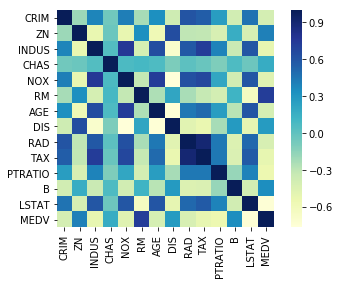

In [88]:
names = []
# Correlation
correlation = house.corr()
correlation_map =sns.heatmap(correlation, square=True, cmap="YlGnBu")

In [89]:
# Data Split for train and test
x=house.iloc[:,0:13]
y=house["MEDV"]
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2)

# Create linear regression object
linear_reg = lm.LinearRegression()

# Train the model using the training sets
linear_reg.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = linear_reg.predict(x_test)
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
final.head()

,Actual,Predicted
331,17.1,20.785378
300,24.8,30.894202
134,15.6,13.100962
454,14.9,14.852798
273,35.2,35.575282


In [90]:
# The coefficients
print('Coefficients: \n', linear_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"% m.mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % m.r2_score(y_test, y_pred))

Coefficients: 
 [-9.80102509e-02  3.70107489e-02  2.24505449e-02  2.50911462e+00
 -1.93467107e+01  4.17458101e+00 -1.17470052e-02 -1.43463385e+00
  2.63030966e-01 -1.15967534e-02 -1.05077109e+00  1.00379537e-02
 -4.13118930e-01]
Mean squared error: 19.13
Variance score: 0.75


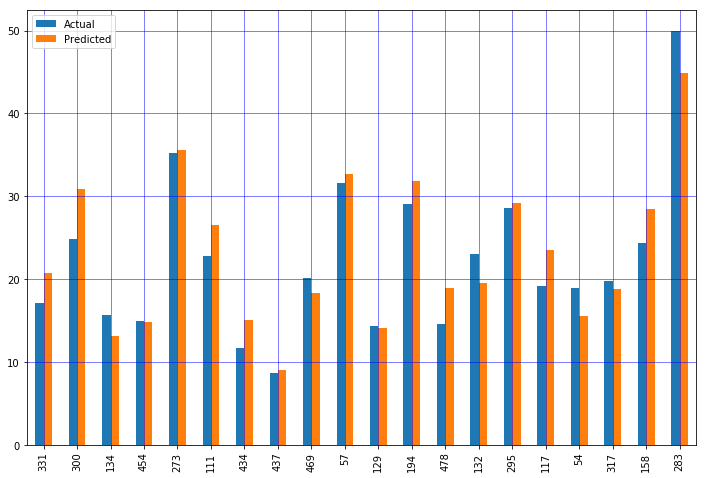

In [91]:
final[:20].plot(kind='bar',figsize=(12,8))
plt.pyplot.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.pyplot.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.pyplot.show()

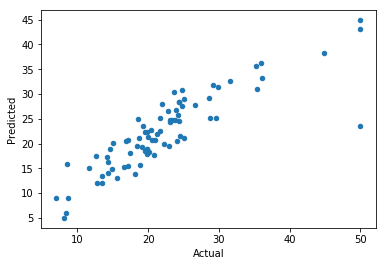

In [95]:
final.plot(x ='Actual', y='Predicted', kind = 'scatter')